In [2]:
#Importing Libraries

from keras.preprocessing.image import ImageDataGenerator
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.utils import img_to_array, array_to_img,load_img

In [6]:
# Getting Images

train_dataset = 'Dataset/images/train'
X = []
for imagename in os.listdir(train_dataset):
    X.append(img_to_array(load_img(train_dataset + "/" +imagename, target_size=(256, 256))))

X = np.array(X, dtype=float)

#Set up train and test data

split = int(0.95 * len(X))
Xtrain = X[:split]
#normalizing the color in the range [0-1]
Xtrain = 1.0/255* Xtrain

In [7]:
#CNN model 
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras import Sequential

In [8]:
model = Sequential()

#Input Layer
model.add(Conv2D(64, (3, 3), input_shape=(256, 256, 1), activation='relu', padding='same'))

#Hidden Layers
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

#Compiling the CNN
model.compile(optimizer='rmsprop', loss='mse', metrics = ['accuracy'])

Epoch 1/500


2022-09-10 20:36:08.705837: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 167772160 exceeds 10% of free system memory.
2022-09-10 20:36:09.821239: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 41943040 exceeds 10% of free system memory.
2022-09-10 20:36:10.472512: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 83886080 exceeds 10% of free system memory.
2022-09-10 20:36:11.036164: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 20971520 exceeds 10% of free system memory.
2022-09-10 20:36:11.151223: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 41943040 exceeds 10% of free system memory.


30/30 [==============================] - 180s 6s/step - loss: 0.9501 - accuracy: 0.6171
Epoch 2/500
30/30 [==============================] - 156s 5s/step - loss: 0.9783 - accuracy: 0.6263
Epoch 3/500
30/30 [==============================] - 156s 5s/step - loss: 0.9826 - accuracy: 0.6174
Epoch 4/500
30/30 [==============================] - 168s 6s/step - loss: 0.9795 - accuracy: 0.6348
Epoch 5/500
30/30 [==============================] - 180s 6s/step - loss: 0.5674 - accuracy: 0.5454
Epoch 6/500
30/30 [==============================] - 178s 6s/step - loss: 0.0133 - accuracy: 0.4410
Epoch 7/500
30/30 [==============================] - 176s 6s/step - loss: 0.0127 - accuracy: 0.5220
Epoch 8/500
30/30 [==============================] - 188s 6s/step - loss: 0.0139 - accuracy: 0.6219
Epoch 9/500
30/30 [==============================] - 185s 6s/step - loss: 0.0104 - accuracy: 0.6136
Epoch 10/500
30/30 [==============================] - 186s 6s/step - loss: 0.0108 - accuracy: 0.6140
Epoch 11/50

30/30 [==============================] - 170s 6s/step - loss: 0.0102 - accuracy: 0.6040
Epoch 163/500
30/30 [==============================] - 177s 6s/step - loss: 0.0094 - accuracy: 0.6052
Epoch 164/500
30/30 [==============================] - 175s 6s/step - loss: 0.0107 - accuracy: 0.6090
Epoch 165/500
30/30 [==============================] - 176s 6s/step - loss: 0.0186 - accuracy: 0.6236
Epoch 166/500
30/30 [==============================] - 173s 6s/step - loss: 0.0104 - accuracy: 0.6029
Epoch 167/500
30/30 [==============================] - 177s 6s/step - loss: 0.0100 - accuracy: 0.6164
Epoch 168/500
30/30 [==============================] - 173s 6s/step - loss: 0.0106 - accuracy: 0.6026
Epoch 169/500
30/30 [==============================] - 168s 6s/step - loss: 0.0106 - accuracy: 0.6307
Epoch 170/500
30/30 [==============================] - 176s 6s/step - loss: 0.0100 - accuracy: 0.6092
Epoch 171/500
30/30 [==============================] - 181s 6s/step - loss: 0.0106 - accuracy: 0

30/30 [==============================] - 184s 6s/step - loss: 0.0097 - accuracy: 0.6041
Epoch 323/500
30/30 [==============================] - 183s 6s/step - loss: 0.0108 - accuracy: 0.6199
Epoch 324/500
30/30 [==============================] - 179s 6s/step - loss: 0.0099 - accuracy: 0.6009
Epoch 325/500
30/30 [==============================] - 181s 6s/step - loss: 0.0103 - accuracy: 0.6128
Epoch 326/500
30/30 [==============================] - 180s 6s/step - loss: 0.0094 - accuracy: 0.6188
Epoch 327/500
30/30 [==============================] - 178s 6s/step - loss: 0.0113 - accuracy: 0.6201
Epoch 328/500
30/30 [==============================] - 185s 6s/step - loss: 0.0097 - accuracy: 0.6186
Epoch 329/500
30/30 [==============================] - 181s 6s/step - loss: 0.0107 - accuracy: 0.6168
Epoch 330/500
30/30 [==============================] - 179s 6s/step - loss: 0.0089 - accuracy: 0.6047
Epoch 331/500
30/30 [==============================] - 193s 6s/step - loss: 0.0106 - accuracy: 0

30/30 [==============================] - 182s 6s/step - loss: 0.0090 - accuracy: 0.5953
Epoch 483/500
30/30 [==============================] - 176s 6s/step - loss: 0.0092 - accuracy: 0.6266
Epoch 484/500
30/30 [==============================] - 178s 6s/step - loss: 0.0103 - accuracy: 0.6278
Epoch 485/500
30/30 [==============================] - 182s 6s/step - loss: 0.0090 - accuracy: 0.6118
Epoch 486/500
30/30 [==============================] - 181s 6s/step - loss: 0.0099 - accuracy: 0.6044
Epoch 487/500
30/30 [==============================] - 192s 6s/step - loss: 0.0090 - accuracy: 0.6090
Epoch 488/500
30/30 [==============================] - 181s 6s/step - loss: 0.0095 - accuracy: 0.6251
Epoch 489/500
30/30 [==============================] - 177s 6s/step - loss: 0.0094 - accuracy: 0.6265
Epoch 490/500
30/30 [==============================] - 178s 6s/step - loss: 0.0104 - accuracy: 0.6185
Epoch 491/500
30/30 [==============================] - 184s 6s/step - loss: 0.0095 - accuracy: 0

INFO:tensorflow:Assets written to: my_model/output_model/assets


INFO:tensorflow:Assets written to: my_model/output_model/assets


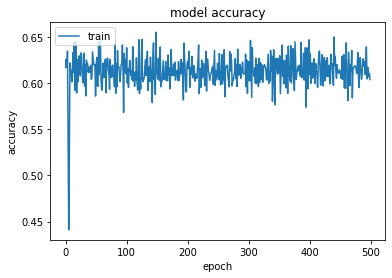

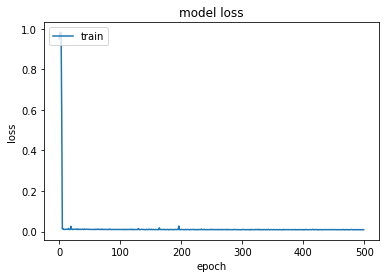

In [9]:
import matplotlib.pyplot as plt

# Image transformer
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)

# Generate training data
batch_size = 10
def image_a_b_gen(batch_size):
    for batch in datagen.flow(Xtrain, batch_size=batch_size):
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:,:,:,0]
        Y_batch = lab_batch[:,:,:,1:] / 128
        yield (X_batch.reshape(X_batch.shape+(1,)), Y_batch)

# Train model      
tensorboard = TensorBoard(log_dir="./output/beta_run")
# trainedmodel = model.fit(image_a_b_gen(batch_size), callbacks=[tensorboard],epochs=500, steps_per_epoch=30)

# Saving the model
model.save('my_model/output_model')


# summarize history for accuracy
plt.plot(trainedmodel.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(trainedmodel.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [3]:
import keras
# load the model
model = keras.models.load_model('my_model/output_model')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 256, 256, 64)      640       
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 512)      

In [5]:
# Load black and white images
color_me = []
test_dataset_loc = 'Dataset/images/test_extra'

for filename in os.listdir(test_dataset_loc)[0]:
  color_me.append(img_to_array(load_img('./profile-modified.jpg', target_size=(256, 256))))
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))

# Test model
output = model.predict(color_me)
output = output * 128

# Output colorizations
for i in range(len(output)):
  cur = np.zeros((256, 256, 3))
  cur[:,:,0] = color_me[i][:,:,0]
  cur[:,:,1:] = output[i]
  imsave("./result/img_"+str(i)+".png", lab2rgb(cur))

1/1 [==============================] - 1s 1s/step


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0